#### We have very balanced dataset for every column in our dataset

In [2]:
import pandas as pd

df=pd.read_csv("../dataset/raw_df.csv")
df.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


Anxiety Level (1-10)
4.0     4883
3.0     4685
5.0     3445
2.0     3280
1.0     1845
6.0     1437
8.0      711
9.0      693
10.0     652
7.0      369
Name: count, dtype: int64


(array([1845., 3280., 4685., 4883., 3445., 1437.,  369.,  711.,  693.,
         652.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

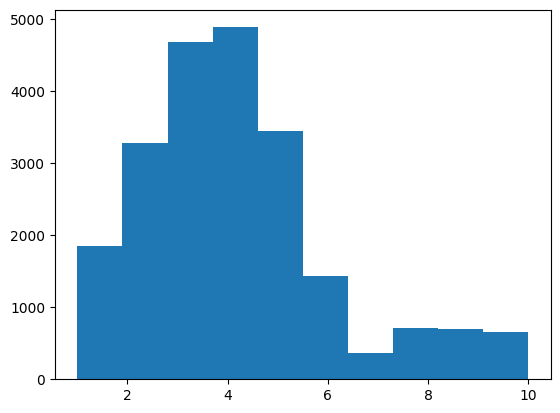

In [3]:
import matplotlib.pyplot as plt
print(df["Anxiety Level (1-10)"].value_counts())
plt.hist(df["Anxiety Level (1-10)"])

In [4]:
numerical_cols=[ col for col in df.columns if df[col].dtype=="int64" or df[col].dtype=="float64" ]
categorical_cols=[col for col in df.columns if df[col].dtype=="object"]

(categorical_cols,numerical_cols)

(['Gender',
  'Occupation',
  'Smoking',
  'Family History of Anxiety',
  'Dizziness',
  'Medication',
  'Recent Major Life Event'],
 ['Age',
  'Sleep Hours',
  'Physical Activity (hrs/week)',
  'Caffeine Intake (mg/day)',
  'Alcohol Consumption (drinks/week)',
  'Stress Level (1-10)',
  'Heart Rate (bpm)',
  'Breathing Rate (breaths/min)',
  'Sweating Level (1-5)',
  'Therapy Sessions (per month)',
  'Diet Quality (1-10)',
  'Anxiety Level (1-10)'])

### Categorical preprocessing.

In [5]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error,mean_squared_error

df_copy=df.copy()

In [6]:
train_df,test_df=train_test_split(df,test_size=0.2,shuffle=True)
train_df

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
19580,28,Other,Engineer,3.8,0.9,419,9,No,No,8,107,25,4,Yes,No,7,Yes,1,9.0
20707,28,Other,Student,6.8,4.1,134,6,No,No,3,90,12,5,No,Yes,2,Yes,6,3.0
16073,26,Female,Artist,8.2,0.6,475,18,No,No,1,92,27,5,Yes,No,7,Yes,2,4.0
14051,37,Female,Teacher,7.3,3.8,81,6,No,Yes,1,84,22,5,Yes,Yes,6,Yes,8,1.0
21837,34,Male,Freelancer,6.9,3.2,342,17,Yes,No,5,98,22,1,Yes,Yes,1,No,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13401,32,Female,Teacher,7.8,0.6,254,9,Yes,No,3,67,16,3,No,No,7,No,3,2.0
16541,32,Male,Teacher,7.1,5.1,232,0,No,No,3,86,28,5,No,No,3,Yes,6,3.0
18522,31,Male,Artist,6.3,0.2,115,11,Yes,Yes,1,89,16,1,Yes,No,9,Yes,6,2.0
16002,42,Other,Other,6.6,4.9,426,9,No,No,4,111,23,2,Yes,Yes,4,Yes,6,5.0


In [7]:
train_df[categorical_cols].head()

,Gender,Occupation,Smoking,Family History of Anxiety,Dizziness,Medication,Recent Major Life Event
19580,Other,Engineer,No,No,Yes,No,Yes
20707,Other,Student,No,No,No,Yes,Yes
16073,Female,Artist,No,No,Yes,No,Yes
14051,Female,Teacher,No,Yes,Yes,Yes,Yes
21837,Male,Freelancer,Yes,No,Yes,Yes,No


In [8]:
encoderOneHot=OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform="pandas")

encoded_categorical_data=encoderOneHot.fit_transform(train_df[categorical_cols])



In [9]:
encoded_categorical_data.head()

,Gender_Female,Gender_Male,Gender_Other,Occupation_Artist,Occupation_Athlete,Occupation_Chef,Occupation_Doctor,Occupation_Engineer,Occupation_Freelancer,Occupation_Lawyer,...,Smoking_No,Smoking_Yes,Family History of Anxiety_No,Family History of Anxiety_Yes,Dizziness_No,Dizziness_Yes,Medication_No,Medication_Yes,Recent Major Life Event_No,Recent Major Life Event_Yes
19580,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
20707,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
16073,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
14051,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
21837,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


#### Numerical features preprocessing

In [10]:
std_scaler=StandardScaler()
scaled_train_df_numerical=std_scaler.fit(train_df[numerical_cols])

In [11]:
scaled_train_df=scaled_train_df_numerical.transform(train_df[numerical_cols])

In [12]:
scaled_train_df_numerical.get_feature_names_out()

array(['Age', 'Sleep Hours', 'Physical Activity (hrs/week)',
       'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
       'Stress Level (1-10)', 'Heart Rate (bpm)',
       'Breathing Rate (breaths/min)', 'Sweating Level (1-5)',
       'Therapy Sessions (per month)', 'Diet Quality (1-10)',
       'Anxiety Level (1-10)'], dtype=object)

In [13]:
numerical_preprocessed_data=pd.DataFrame(columns=numerical_cols,data=scaled_train_df)

### now concat numerical and categorical features

In [14]:
preprocessed_data=pd.concat([numerical_preprocessed_data.reset_index(drop=True),encoded_categorical_data.reset_index(drop=True)],axis=1)

In [15]:
encoded_categorical_data

,Gender_Female,Gender_Male,Gender_Other,Occupation_Artist,Occupation_Athlete,Occupation_Chef,Occupation_Doctor,Occupation_Engineer,Occupation_Freelancer,Occupation_Lawyer,...,Smoking_No,Smoking_Yes,Family History of Anxiety_No,Family History of Anxiety_Yes,Dizziness_No,Dizziness_Yes,Medication_No,Medication_Yes,Recent Major Life Event_No,Recent Major Life Event_Yes
19580,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
20707,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
16073,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
14051,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
21837,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13401,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
16541,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
18522,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
16002,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [16]:
numerical_preprocessed_data

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
0,-0.930303,-2.019433,-1.112986,0.745652,-0.127421,0.734627,0.927384,0.798512,0.655243,1.235451,-1.448337,2.317674
1,-0.930303,0.065914,0.636930,-1.034249,-0.655593,-0.970833,-0.058655,-1.715621,1.370601,-0.560945,0.282618,-0.495050
2,-1.080953,1.039075,-1.277041,1.095386,1.457093,-1.653017,0.057350,1.185302,1.370601,1.235451,-1.102146,-0.026263
3,-0.252377,0.413471,0.472875,-1.365248,-0.655593,-1.653017,-0.406668,0.218327,1.370601,0.876172,0.975000,-1.432625
4,-0.478352,0.135425,0.144766,0.264766,1.281036,-0.288649,0.405363,0.218327,-1.490829,-0.920225,-0.755955,-0.963838
...,...,...,...,...,...,...,...,...,...,...,...,...
17595,-0.629003,0.761029,-1.277041,-0.284817,-0.127421,-0.970833,-1.392707,-0.942042,-0.060114,1.235451,-0.755955,-0.963838
17596,-0.629003,0.274448,1.183778,-0.422213,-1.711936,-0.970833,-0.290664,1.378697,1.370601,-0.201666,0.282618,-0.495050
17597,-0.704328,-0.281644,-1.495780,-1.152909,0.224693,-1.653017,-0.116657,-0.942042,-1.490829,1.954010,0.282618,-0.963838
17598,0.124248,-0.073110,1.074408,0.789368,-0.127421,-0.629741,1.159393,0.411722,-0.775472,0.157613,0.282618,0.442525


In [19]:
preprocessed_data.to_csv("../dataset/preprocessed_train_data.csv")
test_df.to_csv("../dataset/test_df.csv")